In [1]:
pwd

'/home/colili/Documents/PhD/project_john/Code/glacierstats'

# Statistics on certain Svalbard glaciers

In [1]:
%matplotlib inline
import numpy as np

from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km * 1000 # convert to meters
haversine = np.vectorize(haversine)

import pandas as pd

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import scipy.stats as stats

svalbard_bounding_box = {'left_lon':9.9, 'right_lon':26.2, 'bottom_lat':76.276, 'top_lat':80.5}

TTT = pd.read_csv('/home/colili/Documents/PhD/project_john/data_set/glathida-3.1.0/data/TTT.csv')
svalbard_glaciers = TTT[TTT.POINT_LAT.between(76.276, 80.5) & TTT.POINT_LON.between(9.9, 26.2) & (TTT.SURVEY_DATE>20139999)].dropna(subset=['GLACIER_NAME'])

svalbard_names = svalbard_glaciers.GLACIER_NAME.unique()

centerlines_glacs = [
    'AAVATSMARKBREEN'
    ,'ALDOUSBREEN'
    ,'AMENFONNA'
    ,'AUSTFONNA'
    ,'AUSTFONNA LEIGHBREEN'
    ,'AUSTFONNA BASIN 3'
    ,'BODLEYBREEN'
    ,'VEGAFONNA MARIEBREEN'
    ,'NORDENSKIOLDBREEN'
    ,'AUSTFONNA WINSNESBREEN'
    ,'PALANDERISEN'
    ,'COOKBREEN'
    ,'RINGHORNBREEN'
    ,'GULLFAKSEBREEN'
    ,'DUNERBREEN'
    ,'SKINFAKSEBREEN'
    ,'VETERANEN'
    ,'VEGAFONNA ERICABREEN'
    ,'PALANDERBREEN: VEGAFONNA'
    ,'FRANKLINBREEN N'
    ,'FRANKLINBREEN S'
    ,'RABOTBREEN'
    ,'MITTAG-LEFFLERBREEN'
    ,'ALDOUSBREEN'
    ,'NEGRIBREEN'
    ,'HAYESBREEN'
    ,'PETERMANNBREEN'
    ,'OSLOBREEN'
    ,'SVEABREEN'
    ,'RAUDFJORDBREEN'
    ,'MONACOBREEN'
]

surge_label = pd.read_csv('glacier_svalbard_20142018', names=['GLACIER_NAME', 'surge', 'extra'],quotechar="'")
surge_label['GLACIER_NAME'] = surge_label.GLACIER_NAME.apply(lambda x: x.replace("'", '').lstrip())
surge_label['GLACIER_NAME'] = surge_label.GLACIER_NAME.astype(str)
surge_label['surge'] = surge_label.surge.astype(float)
surge_label.fillna(-1, inplace=True)

avg_loc = svalbard_glaciers.groupby('GLACIER_NAME').mean()

avg_loc = surge_label.merge(avg_loc.reset_index())

/home/john/anaconda3/envs/glaciers/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2,4,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# surge_label.merge(avg_loc.reset_index())

In [3]:
# avg_loc.index = avg_loc.index.str.encode('utf-8')

In [4]:
# surge_label['GLACIER_NAME'].str.encode('utf-8')

In [5]:
# surge_label.GLACIER_NAME

# Map of glacier locations on svalbard

In [6]:
avg_loc.head()

,GLACIER_NAME,surge,extra,GlaThiDa_ID,SURVEY_DATE,POINT_LAT,POINT_LON,ELEVATION,THICKNESS,THICKNESS_UNCERTAINTY,DATA_FLAG
0,AAVATSMARKBREEN,1.0,-1.0,2330.0,20150508.0,78.703248,12.096559,330.680000,271.306667,NaN,NaN
1,ALDOUSBREEN,0.0,-1.0,5561.0,20170406.0,79.949936,20.964993,561.776850,291.359189,NaN,NaN
2,AMENFONNA,0.0,-1.0,5537.0,20170406.0,79.866480,21.850894,387.578488,134.883721,NaN,NaN
3,AUSTFONNA,-1.0,-1.0,5536.0,20170406.0,79.827436,24.867372,736.953079,547.453079,NaN,NaN
4,AUSTFONNA BASIN 3,1.0,-1.0,5535.0,20170406.0,79.628231,24.532642,451.644872,357.041239,NaN,NaN


/home/john/anaconda3/envs/glaciers/lib/python3.6/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/john/anaconda3/envs/glaciers/lib/python3.6/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


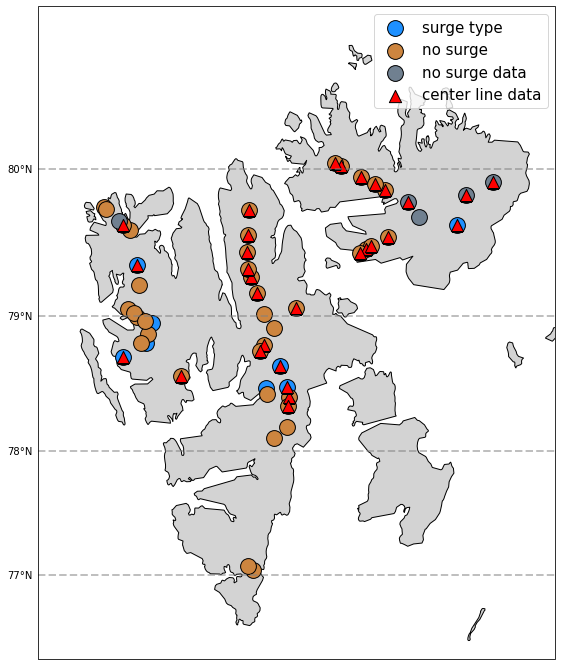

In [7]:
avg_loc_center = svalbard_glaciers[svalbard_glaciers.GLACIER_NAME.isin(centerlines_glacs)].groupby('GLACIER_NAME').mean()

fig, ax = plt.subplots(1, figsize=(20,12))

# proj = ccrs.PlateCarree()                       # the projection you want to use, many are supported, 
proj = ccrs.Mercator()                       # the projection you want to use, many are supported, 
                                                # this one is the standard for geographic coordinates
    
ax = plt.axes(projection=proj)                  # sets the projection

ax.add_feature(cartopy.feature.OCEAN            # add ocean feature
               , zorder=0                       # layer where ocean should plot; 0 is base   
               , facecolor='w'                  # color of the ocean
              )           

ax.add_feature(cartopy.feature.LAND             # add continent feature
               , zorder=0                       # layer where continent should plot; 0 is base
               , edgecolor='black'              # coastline color
               , facecolor='lightgray'          # continent color
              )               

# ax.coastlines(resolution='110m')                # the level of resolution to render the drawings, 
                                                # see documentation for more details
                
gl = ax.gridlines(crs=ccrs.PlateCarree()        
                , draw_labels=True              # label coordinates
                , linewidth=2                   # line properties can be changed similar to matplotlib
                , color='gray'
                , alpha=0.5
                , linestyle='--')

gl.xlabels_top = gl.ylabels_right = False                          # where labels shouldn't be
gl.xlines = True                                                  # turn off x-axis
gl.xlocator = mticker.FixedLocator([-180, -90, 0, 90, 180])        # sets longitude tick marks
gl.xformatter = LONGITUDE_FORMATTER                                # set cartopy formatting
gl.yformatter = LATITUDE_FORMATTER

gl.xlabel_style = {'size': 15, 'color': 'gray'}                    # change features about the longitude labels
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

ax.scatter(avg_loc[avg_loc.surge==1].POINT_LON.values
           ,avg_loc[avg_loc.surge==1].POINT_LAT.values               # plots your data points on the axes
        , marker='o'                                 # symbol for data point
        , c='dodgerblue'                               # symbol facecolor
        , edgecolor='black'                          # symbol edgecolor
        , alpha=1
        , s=250# opacity
        , transform=ccrs.PlateCarree()
          ,label='surge type')              # projection to plot data in

ax.scatter(avg_loc[avg_loc.surge==0].POINT_LON.values
           ,avg_loc[avg_loc.surge==0].POINT_LAT.values               # plots your data points on the axes
        , marker='o'                                 # symbol for data point
        , c='peru'                               # symbol facecolor
        , edgecolor='black'                          # symbol edgecolor
        , alpha=1
        , s=250# opacity
        , transform=ccrs.PlateCarree()
          ,label='no surge')              # projection to plot data in

ax.scatter(avg_loc[avg_loc.surge==-1].POINT_LON.values
           ,avg_loc[avg_loc.surge==-1].POINT_LAT.values               # plots your data points on the axes
        , marker='o'                                 # symbol for data point
        , c='slategray'                               # symbol facecolor
        , edgecolor='black'                          # symbol edgecolor
        , alpha=1
        , s=250# opacity
        , transform=ccrs.PlateCarree()
          ,label='no surge data')              # projection to plot data in

ax.scatter(avg_loc_center.POINT_LON.values
           ,avg_loc_center.POINT_LAT.values               # plots your data points on the axes
        , marker='^'                                 # symbol for data point
        , c='red'                               # symbol facecolor
        , edgecolor='black'                          # symbol edgecolor
        , alpha=1
        , s=150# opacity
        , transform=ccrs.PlateCarree()
             ,label='center line data')              # projection to plot data in

ax.set_extent([svalbard_bounding_box['left_lon']-1,
               svalbard_bounding_box['right_lon']+2,
               svalbard_bounding_box['bottom_lat'],
               svalbard_bounding_box['top_lat']+0.5
              ], crs=ccrs.PlateCarree())


ax.legend(['surge type', 'no surge', 'no surge data', 'center line data'], fontsize=15)

# GPR traces for each glacier w/ center line

In [8]:
# # svalbard_glaciers.groupby('GLACIER_NAME').plot.scatter(x='POINT_LON', y='POINT_LAT')
# data = svalbard_glaciers[svalbard_glaciers.GLACIER_NAME=='VEGAFONNA MARIEBREEN']#.plot_scatter(x='ELEVATION')

# data.describe()

In [9]:
# data.plot.scatter(x='ELEVATION', y='THICKNESS')

In [10]:
# groupby_50 = data.groupby(data.index // 50)
# slopes = groupby_50.apply(lambda x: stats.linregress(x['ELEVATION'], x['THICKNESS']).slope)
# els = groupby_50.ELEVATION.mean()
# thi = groupby_50.THICKNESS.mean()

In [11]:
# fig, ax = plt.subplots()

# ax.scatter(slopes, thi)

In [12]:
# data = svalbard_glaciers[svalbard_glaciers.GLACIER_NAME=='VEGAFONNA MARIEBREEN']
# groupby_50 = data.groupby(data.index // 50)
# start_lat = groupby_50.head(1).POINT_LAT
# start_lon = groupby_50.head(1).POINT_LON
# end_lat = groupby_50.tail(1).POINT_LAT
# end_lon = groupby_50.tail(1).POINT_LON

# haversine(start_lon, start_lat, end_lon, end_lat)

In [13]:
# data = svalbard_glaciers[svalbard_glaciers.GLACIER_NAME=='VEGAFONNA MARIEBREEN']

# data.groupby(data.index // 50).mean()

In [15]:
# def get_slopes_for_index_window(data, window=50):
#     gb_50 = data.groupby(data.index // window)
#     slopes = gb_50.apply(lambda x: stats.linregress(x['ELEVATION'], x['THICKNESS']).slope)
#     els = gb_50.ELEVATION.mean()
#     thi = gb_50.THICKNESS.mean()
#     return np.array([slopes, els, thi]).transpose()

# data = svalbard_glaciers[svalbard_glaciers.GLACIER_NAME=='VEGAFONNA MARIEBREEN']
# get_slopes_for_index_window(data)

# Calculate slopes per windows

In [423]:
def get_slopes_for_index_window(data, window=50):
    gb_50 = data.groupby(data.index // window)
    
    start = gb_50.head(1)
    end = gb_50.tail(1)
    
    start_lat = start.POINT_LAT
    start_lon = start.POINT_LON
    end_lat = end.POINT_LAT
    end_lon = end.POINT_LON

    window_length = haversine(start_lon, start_lat, end_lon, end_lat)
    
    thick_1 = start.THICKNESS
#     thick_1 = start.ELEVATION
    thick_2 = end.THICKNESS
#     thick_2 = end.ELEVATION
    thick = thick_2.values - thick_1.values
    el = start.ELEVATION.values - end.ELEVATION.values
    thick = el - thick

#     print(thick.shape)
#     return np.arctan([thick, window_length]), gb_50.ELEVATION.mean().values, gb_50.THICKNESS.mean().values
#     return np.arctan(thick/window_length), gb_50.ELEVATION.mean().values, gb_50.THICKNESS.mean().values, np.array((data.GLACIER_NAME.values[0],)*thick.shape[0])
    return np.arctan(thick/window_length), gb_50.ELEVATION.mean().values, gb_50.THICKNESS.mean().values, np.array((data.GLACIER_NAME.values[0],)*thick.shape[0]), np.array(((data.THICKNESS.mean(),)*thick.shape[0]))

data = svalbard_glaciers[svalbard_glaciers.GLACIER_NAME=='VEGAFONNA MARIEBREEN']
x, y, z, n, m = get_slopes_for_index_window(data)
m


array([205.21190476, 205.21190476, 205.21190476, 205.21190476,
       205.21190476, 205.21190476, 205.21190476, 205.21190476,
       205.21190476])

In [469]:
s = []
for g in centerlines_glacs:
    
    # TODO:  calculate a window size per g to produce same number of points
    #        per glacier
    
    s.append(get_slopes_for_index_window(
        svalbard_glaciers[svalbard_glaciers.GLACIER_NAME==g]
        , window=500))
#     sls = get_slopes_for_index_window(
#         svalbard_glaciers[svalbard_glaciers.GLACIER_NAME==g]
#         , window=50)
#     ids = np.array((g,)*sls[0].shape[0])
#     s.append(np.array([ids, sls]))


In [470]:
s[0]

(array([-0.05757967, -0.05160564]),
 array([156.13043478, 362.29133858]),
 array([209.56521739, 282.48818898]),
 array(['AAVATSMARKBREEN', 'AAVATSMARKBREEN'], dtype='<U15'),
 array([271.30666667, 271.30666667]))

In [471]:
# slopes = pd.DataFrame()
# for x in s:
#     slopes = pd.concat([slopes, pd.DataFrame(np.vstack(x)).transpose()])
    
# slopes.columns = ['id', 'slope', 'el', 'thick']
# slopes['thick'] = slopes.thick.astype(float)
# slopes['slope'] = slopes.slope.astype(float)

In [472]:
# slopes = pd.DataFrame(np.hstack(s).transpose(), columns=['slope', 'el', 'thick','GLACIER_NAME'])
slopes = pd.DataFrame(np.hstack(s).transpose(), columns=['slope', 'el', 'thick','GLACIER_NAME', 'mean_thick'])
slopes['slope'] = slopes.slope.astype(np.float64)
slopes['thick'] = slopes.thick.astype(np.float64)
slopes['el'] = slopes.el.astype(np.float64)
slopes['mean_thick'] = slopes.mean_thick.astype(np.float64)
slopes.dtypes

slope           float64
el              float64
thick           float64
GLACIER_NAME     object
mean_thick      float64
dtype: object

In [473]:
slopes = slopes.merge(surge_label)

In [474]:
slopes.head()

,slope,el,thick,GLACIER_NAME,mean_thick,surge,extra
0,-0.057580,156.130435,209.565217,AAVATSMARKBREEN,271.306667,1.0,-1.0
1,-0.051606,362.291339,282.488189,AAVATSMARKBREEN,271.306667,1.0,-1.0
2,0.026645,555.430137,269.843836,ALDOUSBREEN,291.359189,0.0,-1.0
3,-0.011068,566.674419,307.961945,ALDOUSBREEN,291.359189,0.0,-1.0
4,0.026645,555.430137,269.843836,ALDOUSBREEN,291.359189,0.0,-1.0


### Detrending the thickness with the mean thickness

In [475]:
slopes['detrend_thick'] = (slopes.thick - slopes.mean_thick).abs()

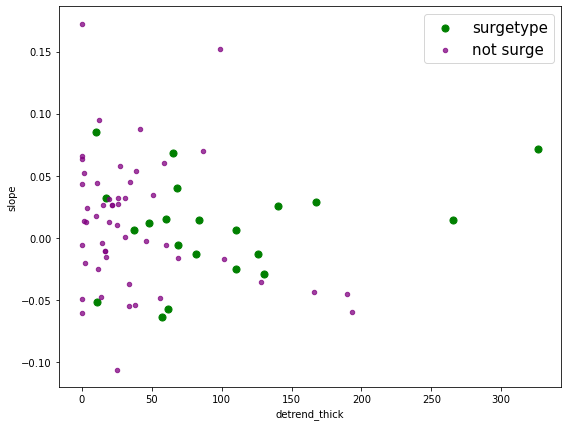

In [476]:
fig, ax = plt.subplots(figsize=(9, 7))
slopes[slopes.surge==1].plot.scatter(y='slope', x='detrend_thick', color='green', ax=ax, label='surgetype', s=50)
slopes[slopes.surge==0].plot.scatter(y='slope', x='detrend_thick', color='purple', ax=ax, label='not surge', alpha=0.75)
ax.legend(fontsize=15)

# ax.plot([-10, 650], [0,0], color='black', alpha=0.5)

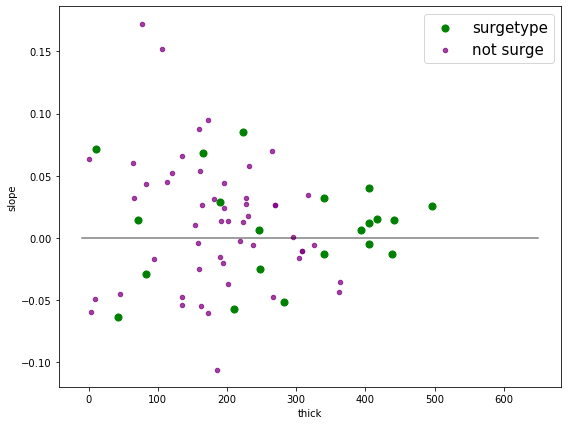

In [477]:
fig, ax = plt.subplots(figsize=(9, 7))
slopes[slopes.surge==1].plot.scatter(y='slope', x='thick', color='green', ax=ax, label='surgetype', s=50)
slopes[slopes.surge==0].plot.scatter(y='slope', x='thick', color='purple', ax=ax, label='not surge', alpha=0.75)
ax.legend(fontsize=15)

ax.plot([-10, 650], [0,0], color='black', alpha=0.5)

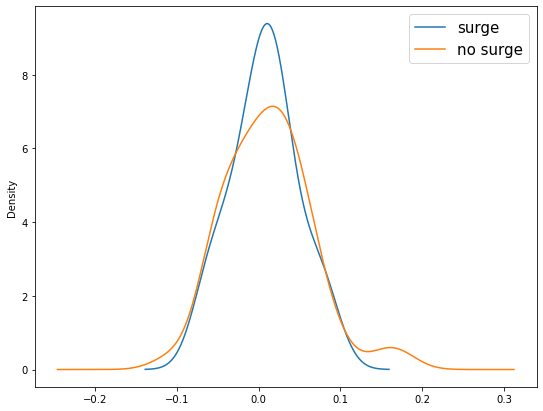

In [478]:
fig, ax = plt.subplots(figsize=(9, 7))
slopes[slopes.surge==1].slope.plot.kde(ax=ax, label='surge')
slopes[slopes.surge==0].slope.plot.kde(ax=ax, label='no surge')
ax.legend(fontsize=15)

<AxesSubplot:>

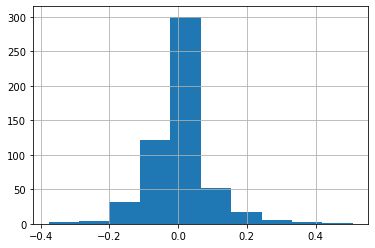

In [203]:
slopes.slope.hist()

<AxesSubplot:>

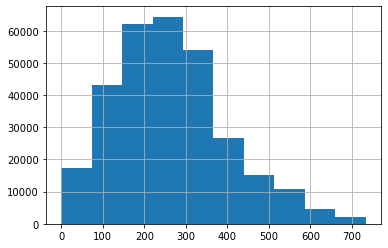

In [204]:
svalbard_glaciers.THICKNESS.hist()

In [192]:
# slopes.corr()

,slope,el,thick
slope,1.000000,0.007653,-0.026643
el,0.007653,1.000000,0.017820
thick,-0.026643,0.017820,1.000000


In [193]:
# np.pi/4

0.7853981633974483

In [194]:
# slopes_converge = slopes[slopes.slope.between(-1, 1)]

,slope,el,thick
slope,1.000000,0.007653,-0.026643
el,0.007653,1.000000,0.017706
thick,-0.026643,0.017706,1.000000


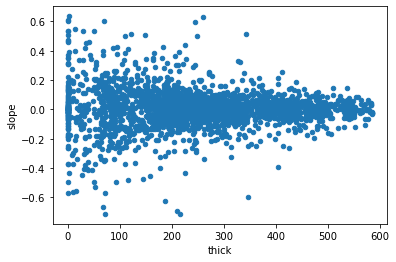

In [195]:
# slopes_converge.plot.scatter(x='thick', y='slope')
# slopes_converge.corr()

In [70]:
# svalbard_names

array(['ELFENBEINBREEN', 'SVEIGBREEN', 'HORNBREEN', 'AAVATSMARKBREEN',
       'SIDEVEGEN', 'CONWAYBREEN', 'FEIRINGBREEN', 'BLOMSTRANDBREEN',
       'HAMBERGBREEN', 'VON POSTBREEN', 'TUNABREEN', 'KRONEBREEN',
       'INFANTFONNA', 'KONGSVEGEN', 'KONGSBREEN', 'AUSTFONNA BASIN 3',
       'AUSTFONNA', 'AMENFONNA', 'BODLEYBREEN', 'AUSTFONNA LEIGHBREEN',
       'VEGAFONNA MARIEBREEN', 'NORDENSKIOLDBREEN',
       'AUSTFONNA WINSNESBREEN', 'ETONBREEN: AUSTFONNA', 'PALANDERISEN',
       'COOKBREEN', 'RINGHORNBREEN', 'GULLFAKSEBREEN', 'DUNERBREEN',
       'SKINFAKSEBREEN', 'VETERANEN', 'VEGAFONNA ERICABREEN',
       'PALANDERBREEN: VEGAFONNA', 'FRANKLINBREEN N', 'FRANKLINBREEN S',
       'RABOTBREEN', 'MITTAG-LEFFLERBREEN', 'ALDOUSBREEN',
       'CHYDENIUSBREEN', 'NEGRIBREEN', 'HAYESBREEN', 'PETERMANNBREEN',
       'HINLOPENBREEN', 'OSLOBREEN', 'SVEABREEN', 'TINAYREBREEN',
       'KENNEDYBREEN', 'SVITJODBREEN', 'IDABREEN', 'CHAVEAUXBREEN',
       'RAUDFJORDBREEN', 'MONACOBREEN'], dtype=object)

<AxesSubplot:xlabel='POINT_LON', ylabel='POINT_LAT'>

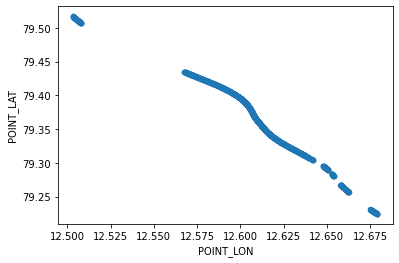

In [14]:
# svalbard_glaciers[svalbard_glaciers.GLACIER_NAME=='MONACOBREEN'].plot.scatter(x='POINT_LON', y='POINT_LAT')

# Importing Heidi database

In [484]:
heidi = pd.read_excel('/home/colili/Documents/PhD/project_john/data_set/data_sevestre_benn/Surge_database_heidi.xlsx')
heidi_sv = heidi[heidi.Country=='Svalbard']
heidi_sv['surge'] = heidi_sv['Number of dated surges'].apply(lambda x: 1 if x > 0 else 0)
heidi_sv['thick'] = heidi_sv['ZMAX'] - heidi_sv['ZMIN']

/home/john/anaconda3/envs/glaciers/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/john/anaconda3/envs/glaciers/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [486]:
heidi_sv.head()

,Country,RGI_ID,GLIMS_ID,Glacier_Name,Number of dated surges,CENLAT,CENLON,AREA,ZMIN,ZMAX,ZMED,SLOPE,ASPECT,LMAX,surge,thick
0,Svalbard,RGI50.07.01130,G016561E78093N,Kokbreen,0,78.093,16.5613,18.191,160.0,963.0,582.0,11.4,196.0,7636.0,0,803.0
570,Svalbard,RGI50-01.19042,G219153E61116N,Brikkerne Gletscher,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
928,Svalbard,RGI50-07.00025,G023512E79401N,Bråsvellbreen Austfonna basin 1,1,79.4014,23.5121,1095.853,1.0,926.0,271.0,4.4,184.0,50954.0,1,925.0
929,Svalbard,RGI50-07.00025,G023512E79401N,Brandtbreen,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
930,Svalbard,RGI50-07.00027,G024554E79593N,Austfonna basin 3,3,79.5931,24.5544,1226.367,2.0,917.0,507.0,9.0,140.0,56487.0,1,915.0


<AxesSubplot:xlabel='thick', ylabel='SLOPE'>

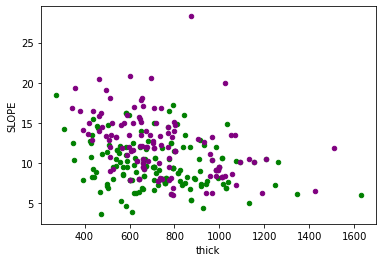

In [489]:
fig, ax = plt.subplots()

heidi_sv[heidi_sv.surge==1].plot.scatter(x='thick', y='SLOPE', c='green',ax=ax)
heidi_sv[heidi_sv.surge==0].plot.scatter(x='thick', y='SLOPE', c='purple',ax=ax)

<AxesSubplot:ylabel='Density'>

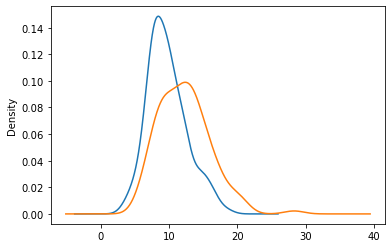

In [492]:
fig, ax = plt.subplots()
heidi_sv[heidi_sv.surge==1].SLOPE.plot.kde(ax=ax, label='surge type')
heidi_sv[heidi_sv.surge==0].SLOPE.plot.kde(ax=ax, label='NOT surge type')

<AxesSubplot:ylabel='Density'>

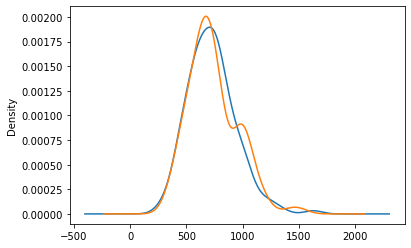

In [493]:
fig, ax = plt.subplots()
heidi_sv[heidi_sv.surge==1].thick.plot.kde(ax=ax, label='surge type')
heidi_sv[heidi_sv.surge==0].thick.plot.kde(ax=ax, label='NOT surge type')